# 資料使用

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import copy

#讀取表格
patent_data = pd.read_csv('/home/wang/Desktop/Auberon/paper/1_CCVAE/patent_top500_2013.csv')

#包含原始表格全部欄位資料的dataframe
df = DataFrame(patent_data,columns=['PatentNumber','Title','Abstract','IssuedYear','AppliedYear','AssigneeCNT',\
                                    'AssigneeCountryCNT','InventorCNT','InventorCountryCNT','FirstAssignee',\
                                    'FirstAssigneeCountry','FirstInventor','FirstInventorCountry','ReferenceCNT',\
                                    'TimeCitedCNT','TimeCitedFiveYearCNT','NPRCNT','ForeignRefCNT','IPCCNT',\
                                    'CPCCNT','ClaimCNT','Han_name','MainIPCSubclass','MainIPCMaingroup',\
                                    'FirstIPCFullHierarchyName','MainCPCSubclass','MainCPCMaingroup',\
                                    'FirstCPCFullHierarchyName','Techn_sector','Techn_field','Techn_field_nr',\
                                    'Docdb_Family_Size','Geog_Family_Size','Inpadoc_Family_Size','Uslitigation',\
                                    'AssAssDistance','InvInvDistance','AssInvDistance','Originality3Class',\
                                    'Generality3Class','GeneralityFiveYear3Class','GeneralityTenYear3Class',\
                                    'Originality4Class','Generality4Class','GeneralityFiveYear4Class',\
                                    'GeneralityTenYear4Class','Originality5Class','Generality5Class',\
                                    'GeneralityFiveYear5Class','GeneralityTenYear5Class','Originality3Class_cpc',\
                                    'GeneralityFiveYear3Class_cpc','Originality4Class_cpc',\
                                    'GeneralityFiveYear4Class_cpc','Originality5Class_cpc',\
                                    'GeneralityFiveYear5Class_cpc','InvCtry_Originality','InvCtry_Generality_5Y',\
                                    'SUM_Back_distance','SUM_For_distance_5Y','AVG_Back_distance',\
                                    'AVG_For_distance_5Y','Industry_Originality','Industry_Generality_5Y',\
                                    'Ass_Originality','Ass_Generality_5Y','Mean_longevity','Max_longevity',\
                                    'InvInv_Cultural_Distance','AssAss_Cultural_Distance'])

In [2]:
#修剪一些不必要的欄位

#for example (下方)
# df = df.drop(columns=['PatentNumber','IssuedYear','AppliedYear','FirstAssigneeType','FirstAssigneeCountry',\
#                                     'FirstInventorCountry','Sector','Han_name','Han_harmonized','Techn_sector',\
#                                     'Techn_field_nr'])

In [3]:
#包含有意義的數值型態全部欄位資料的dataframe
df = DataFrame(patent_data,columns=['AssigneeCNT','AssigneeCountryCNT','InventorCNT','InventorCountryCNT',\
                                    'ReferenceCNT','TimeCitedFiveYearCNT','NPRCNT','ForeignRefCNT','IPCCNT',\
                                    'CPCCNT','ClaimCNT','Docdb_Family_Size','Geog_Family_Size',\
                                    'Inpadoc_Family_Size','AssAssDistance','InvInvDistance','AssInvDistance',\
                                    'Originality3Class','Generality3Class','GeneralityFiveYear3Class',\
                                    'GeneralityTenYear3Class','Originality4Class','Generality4Class',\
                                    'GeneralityFiveYear4Class','GeneralityTenYear4Class','Originality5Class',\
                                    'Generality5Class','GeneralityFiveYear5Class','GeneralityTenYear5Class',\
                                    'Originality3Class_cpc','GeneralityFiveYear3Class_cpc','Originality4Class_cpc',\
                                    'GeneralityFiveYear4Class_cpc','Originality5Class_cpc',\
                                    'GeneralityFiveYear5Class_cpc','InvCtry_Originality','InvCtry_Generality_5Y',\
                                    'SUM_Back_distance','SUM_For_distance_5Y','AVG_Back_distance',\
                                    'AVG_For_distance_5Y','Industry_Originality','Industry_Generality_5Y',\
                                    'Ass_Originality','Ass_Generality_5Y','InvInv_Cultural_Distance',\
                                    'AssAss_Cultural_Distance'])


In [4]:
print (df.columns)
patent_box_001 = []

for i in df.columns:
    patent_box_001.append(i)
    
print (patent_box_001)
patent_box_002 = copy.deepcopy(patent_box_001)
print (patent_box_002)

Index(['AssigneeCNT', 'AssigneeCountryCNT', 'InventorCNT',
       'InventorCountryCNT', 'ReferenceCNT', 'TimeCitedFiveYearCNT', 'NPRCNT',
       'ForeignRefCNT', 'IPCCNT', 'CPCCNT', 'ClaimCNT', 'Docdb_Family_Size',
       'Geog_Family_Size', 'Inpadoc_Family_Size', 'AssAssDistance',
       'InvInvDistance', 'AssInvDistance', 'Originality3Class',
       'Generality3Class', 'GeneralityFiveYear3Class',
       'GeneralityTenYear3Class', 'Originality4Class', 'Generality4Class',
       'GeneralityFiveYear4Class', 'GeneralityTenYear4Class',
       'Originality5Class', 'Generality5Class', 'GeneralityFiveYear5Class',
       'GeneralityTenYear5Class', 'Originality3Class_cpc',
       'GeneralityFiveYear3Class_cpc', 'Originality4Class_cpc',
       'GeneralityFiveYear4Class_cpc', 'Originality5Class_cpc',
       'GeneralityFiveYear5Class_cpc', 'InvCtry_Originality',
       'InvCtry_Generality_5Y', 'SUM_Back_distance', 'SUM_For_distance_5Y',
       'AVG_Back_distance', 'AVG_For_distance_5Y', 'Industry

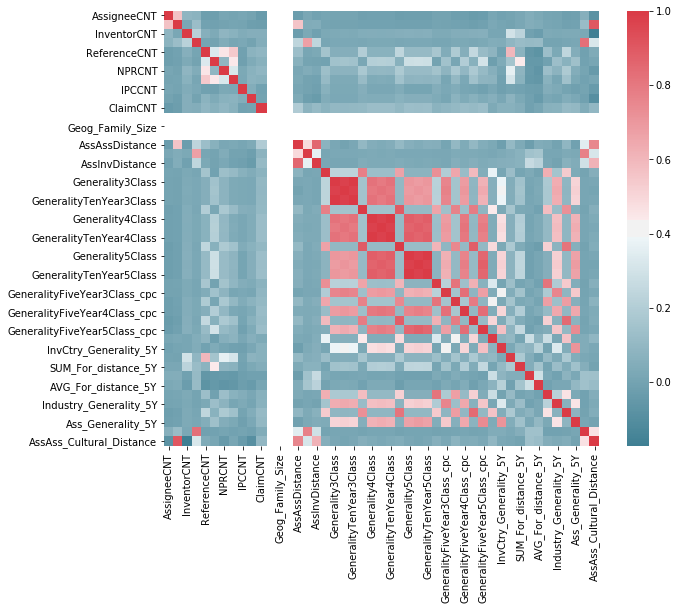

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl


f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [23]:
cor1 = corr.sort_values(by=['TimeCitedFiveYearCNT'], ascending=False, axis=1)

In [27]:
cor1[5:6]

,TimeCitedFiveYearCNT,ForeignRefCNT,SUM_For_distance_5Y,ReferenceCNT,GeneralityFiveYear5Class_cpc,GeneralityFiveYear5Class,GeneralityTenYear5Class,Generality5Class,GeneralityFiveYear4Class,GeneralityTenYear4Class,...,Industry_Originality,AssigneeCountryCNT,IPCCNT,InvCtry_Originality,AssigneeCNT,AVG_Back_distance,AVG_For_distance_5Y,Docdb_Family_Size,Geog_Family_Size,Inpadoc_Family_Size
TimeCitedFiveYearCNT,1.0,0.441859,0.440925,0.328737,0.300191,0.288919,0.283817,0.283812,0.210488,0.204624,...,-0.008081,-0.008117,-0.015773,-0.017117,-0.017692,-0.043598,-0.046054,NaN,NaN,NaN


In [32]:
cor1_list_columns = cor1[5:6].columns.tolist()

In [30]:
cor1_list_values = cor1[5:6].values.tolist()

In [33]:
cor1_list_columns

['TimeCitedFiveYearCNT',
 'ForeignRefCNT',
 'SUM_For_distance_5Y',
 'ReferenceCNT',
 'GeneralityFiveYear5Class_cpc',
 'GeneralityFiveYear5Class',
 'GeneralityTenYear5Class',
 'Generality5Class',
 'GeneralityFiveYear4Class',
 'GeneralityTenYear4Class',
 'Generality4Class',
 'GeneralityFiveYear4Class_cpc',
 'SUM_Back_distance',
 'GeneralityFiveYear3Class',
 'GeneralityTenYear3Class',
 'Generality3Class',
 'GeneralityFiveYear3Class_cpc',
 'Ass_Generality_5Y',
 'Industry_Generality_5Y',
 'NPRCNT',
 'Ass_Originality',
 'AssAssDistance',
 'Originality5Class',
 'ClaimCNT',
 'Originality5Class_cpc',
 'InvCtry_Generality_5Y',
 'CPCCNT',
 'InventorCNT',
 'Originality4Class',
 'Originality4Class_cpc',
 'AssAss_Cultural_Distance',
 'InvInvDistance',
 'Originality3Class_cpc',
 'InventorCountryCNT',
 'AssInvDistance',
 'Originality3Class',
 'InvInv_Cultural_Distance',
 'Industry_Originality',
 'AssigneeCountryCNT',
 'IPCCNT',
 'InvCtry_Originality',
 'AssigneeCNT',
 'AVG_Back_distance',
 'AVG_For_di

In [31]:
cor1_list_values

[[1.0,
  0.44185911059672023,
  0.4409245601973882,
  0.32873663468820574,
  0.3001912025200551,
  0.28891851723185286,
  0.2838168495704399,
  0.28381181080277285,
  0.21048847477656868,
  0.2046238755025473,
  0.20461418527903455,
  0.20184542447223447,
  0.15759046087548445,
  0.15428120066512183,
  0.14813989258673857,
  0.14812589722987551,
  0.14519059350674063,
  0.1397072416940023,
  0.12732809702105177,
  0.09001814824938657,
  0.06929113816135238,
  0.06634935461552528,
  0.06453956617927936,
  0.0640336539414773,
  0.0632635447742334,
  0.03798128203821481,
  0.03789556897145853,
  0.03262930947951645,
  0.016995014460849067,
  0.015227382531087939,
  0.012064325662827018,
  0.004172135034392928,
  0.0017858259715636763,
  0.0013734466097313467,
  -0.0018325638109543685,
  -0.002120563833248426,
  -0.005209930504057176,
  -0.008080560065167549,
  -0.00811680417381414,
  -0.01577329757820522,
  -0.017116770884250357,
  -0.017692473085343045,
  -0.043597953082987355,
  -0.0460

In [ ]:
for i in range(30-40):
    num_str=num_str[:-len(str(i))]
    num_str= num_str+str(i)
    URL=URL_pre+num_str+URL_pos
    cmd='curl '+URL+' -o ~/Desktop/pics2/'+num_str+'.jpg'
    os.system(cmd)